# Transforms in matplotlib
an example in polar coordinates

Coordinate systems in matplotlib:
- FC : Figure coordinates (pixels)
- NFC : Normalized figure coordinates (0 $\rightarrow$ 1)
- DC : Data coordinates (data units)
- NDC : Normalized data coordinates (0 $\rightarrow$ 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

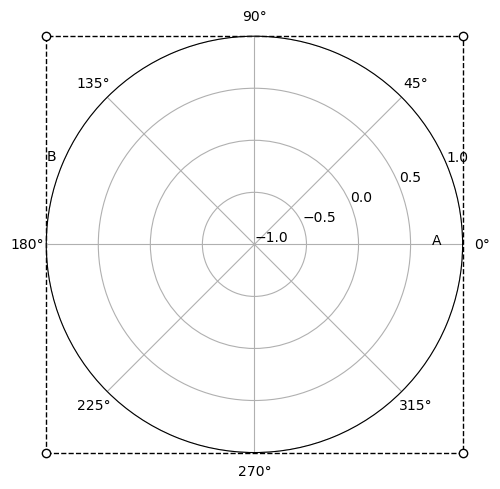

In [2]:
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection="polar")

ax.set_ylim(-1, 1)
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

FC_to_DC = ax.transData.inverted().transform
NDC_to_FC = ax.transAxes.transform
NDC_to_DC = lambda x: FC_to_DC(NDC_to_FC(x))

# Correct
P = NDC_to_DC([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Incorrect
#P = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

ax.plot(P[:, 0],
        P[:, 1],
        clip_on=False,
        color="k",
        linewidth=1.0,
        linestyle="--",
        zorder=-10)

ax.scatter(P[:-1, 0], 
           P[:-1, 1], 
           clip_on=False, 
           facecolor="w", 
           edgecolor="k")

mytext_coords = [0, 0.7]
ax.text(mytext_coords[0], mytext_coords[1], 'A')
ax.text(mytext_coords[0], mytext_coords[1], 'B', transform=ax.transAxes)

fig.tight_layout()